In [1]:
# Importamos librerias
import numpy as np
import pandas as pd

In [2]:
# Leemos los datos de calidad del aire
y_tetuan = pd.read_csv("Predictandos_tetuan.csv", usecols = [1, 2, 3])

In [3]:
y_tetuan

,PM10(µg/m³),NO2(µg/m³),CO(mg/m³)
0,22.000000,13.0,0.5
1,23.000000,13.0,0.4
2,16.000000,16.0,0.4
3,18.702364,9.0,0.3
4,11.000000,22.0,0.5
...,...,...,...
708,21.000000,24.0,0.6
709,17.000000,26.0,0.3
710,24.000000,27.0,0.4
711,13.000000,19.0,0.3


In [4]:
# Seleccionamos un contaminante
y_tetuan_no2 = y_tetuan.iloc[:, 1]

In [5]:
# Cargamos los datos meteorologicos
x_meteo = pd.read_csv("Predictores_meteo.csv", usecols = [1, 2, 3, 4])

In [6]:
x_meteo

,prec,tmed,velmedia,hrMedia
0,0.0,20.8,5.3,37.0
1,0.0,17.4,3.3,74.0
2,0.0,15.8,4.7,55.0
3,22.7,13.2,6.1,90.0
4,1.4,8.4,3.9,71.0
...,...,...,...,...
708,0.2,10.8,3.3,82.0
709,0.0,13.8,4.7,78.0
710,0.0,11.7,1.7,95.0
711,1.9,12.1,2.2,65.0


In [7]:
# Cargamos los datos de trafico (clusters)
x_trafico = pd.read_csv("Predictores_trafico.csv", usecols = [1, 2, 3, 4, 5, 6, 7])

In [8]:
x_trafico

,0,1,2,3,4,5,6
0,1536.925373,11737.250000,6084.238095,13624.5,3986.739130,21879.0,7803.076923
1,1715.358209,14460.833333,6765.428571,18251.3,4255.195652,26665.0,9429.846154
2,2513.597015,19220.666667,10135.761905,26953.5,6366.543478,36489.0,13477.461538
3,2720.014925,18290.333333,10179.238095,26131.2,6480.739130,37950.0,12971.076923
4,2854.029851,18302.833333,10462.714286,26567.3,6640.956522,33811.0,13355.846154
...,...,...,...,...,...,...,...
708,2680.492537,18412.916667,10084.000000,27315.9,6770.369565,38451.0,14159.923077
709,2702.731343,18815.083333,10230.666667,27864.3,6922.413043,40714.0,14508.615385
710,2646.358209,18737.583333,10387.190476,28395.0,7039.173913,40774.0,14660.923077
711,2189.716418,16321.083333,8893.333333,23827.1,5891.021739,33172.0,12269.461538


In [9]:
# Juntamos datos meteo con calidad del aire
aux = pd.DataFrame(y_tetuan_no2).join(x_meteo)

In [10]:
# Juntamos con trafico
data = aux.join(x_trafico)

In [11]:
data

,NO2(µg/m³),prec,tmed,velmedia,hrMedia,0,1,2,3,4,5,6
0,13.0,0.0,20.8,5.3,37.0,1536.925373,11737.250000,6084.238095,13624.5,3986.739130,21879.0,7803.076923
1,13.0,0.0,17.4,3.3,74.0,1715.358209,14460.833333,6765.428571,18251.3,4255.195652,26665.0,9429.846154
2,16.0,0.0,15.8,4.7,55.0,2513.597015,19220.666667,10135.761905,26953.5,6366.543478,36489.0,13477.461538
3,9.0,22.7,13.2,6.1,90.0,2720.014925,18290.333333,10179.238095,26131.2,6480.739130,37950.0,12971.076923
4,22.0,1.4,8.4,3.9,71.0,2854.029851,18302.833333,10462.714286,26567.3,6640.956522,33811.0,13355.846154
...,...,...,...,...,...,...,...,...,...,...,...,...
708,24.0,0.2,10.8,3.3,82.0,2680.492537,18412.916667,10084.000000,27315.9,6770.369565,38451.0,14159.923077
709,26.0,0.0,13.8,4.7,78.0,2702.731343,18815.083333,10230.666667,27864.3,6922.413043,40714.0,14508.615385
710,27.0,0.0,11.7,1.7,95.0,2646.358209,18737.583333,10387.190476,28395.0,7039.173913,40774.0,14660.923077
711,19.0,1.9,12.1,2.2,65.0,2189.716418,16321.083333,8893.333333,23827.1,5891.021739,33172.0,12269.461538


In [12]:
# Conjunto de train
data_train = data[0:round(len(data) * 0.75)]

In [13]:
# Conjunto de test
data_test = data[round(len(data) * 0.75):]

In [14]:
# Predictando y predictores de train
y_train = data_train.iloc[:, 0]
x_train = data_train.iloc[:, 1:]

In [15]:
# Predictando y predictores de test
y_test = data_test.iloc[:, 0]
x_test = data_test.iloc[:, 1:]

### Regresión lineal múltiple

Mean Squared Error: 76.94492783969982
R^2 Score: -2.1831948448097345
[-2.07782081e-02 -5.27540122e-02 -9.79668200e-01 -2.03000014e-02
  8.95669261e-03  5.38726646e-04  9.77665487e-03  3.73927015e-04
 -1.67445865e-02 -4.69840284e-04 -1.28363760e-03]


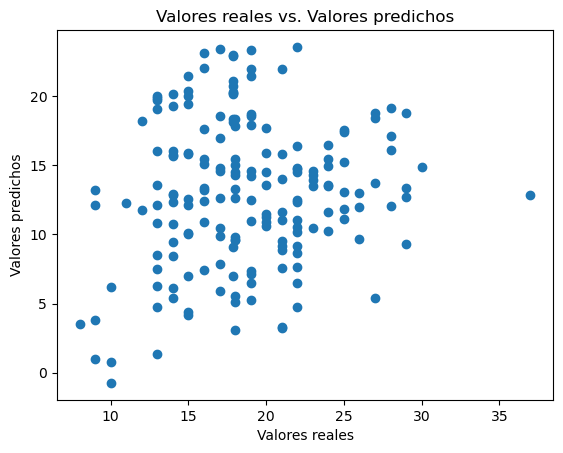

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Crear una instancia del modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(x_train.values, y_train.values)

# Predecir los valores con el conjunto de prueba
y_pred = model.predict(x_test.values)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test.values, y_pred)
r2 = r2_score(y_test.values, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(model.coef_)

# Visualizar los resultados
plt.scatter(y_test.values, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos')
#plt.savefig('Pred_vs_teor_rl')
plt.show()

### Random forest

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}
Mean Squared Error (mejorado): 41.10578651183748
R^2 Score (mejorado): -0.7005374023993762


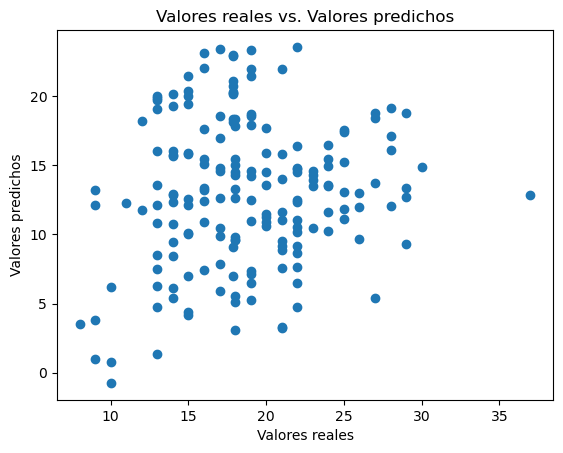

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir la rejilla de parámetros para buscar
param_grid = {
    'n_estimators': [200, 300, 400, 500, 600],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=3), 
                           param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo usando la búsqueda en rejilla
grid_search.fit(x_train.values, y_train.values)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
best_model.fit(x_train.values, y_train.values)

# Predecir los valores con el conjunto de prueba
y_pred_best = best_model.predict(x_test.values)

# Evaluar el rendimiento del modelo ajustado
mse_best = mean_squared_error(y_test.values, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Mean Squared Error (mejorado): {mse_best}')
print(f'R^2 Score (mejorado): {r2_best}')

### Xgboost

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.7}
RMSE: 5.38


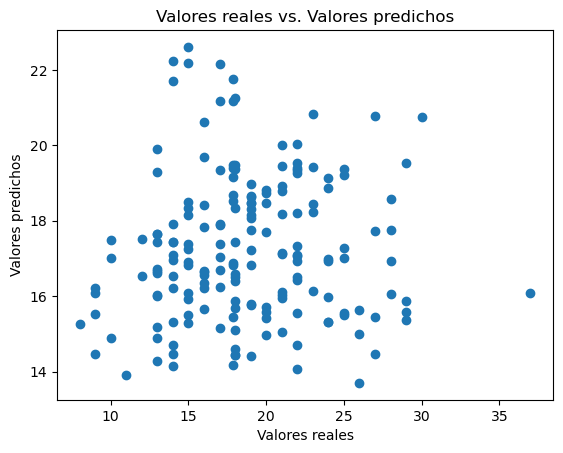

In [21]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Definir el modelo
model = xgb.XGBRegressor(objective='reg:squarederror')

# Definir los hiperparámetros a buscar
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Realizar la búsqueda
grid_search.fit(x_train.values, y_train.values)

# Imprimir los mejores parámetros y el RMSE asociado
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

# Hacer predicciones y evaluar el modelo
preds = best_model.predict(x_test.values)
mse = mean_squared_error(y_test.values, preds)
rmse = mse ** 0.5
print(f'RMSE: {rmse:.2f}')

# Visualizar los resultados
plt.scatter(y_test.values, preds)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos')
#plt.savefig('Pred_vs_teor_xgboost')
plt.show()

### SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Definir la rejilla de parámetros para buscar
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001]
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, refit=True, verbose=1)

# Entrenar el modelo usando la búsqueda en rejilla
grid_search.fit(x_train.values, y_train.values)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Predecir los valores con el conjunto de prueba
y_pred_best = best_model.predict(x_test.values)

# Evaluar el rendimiento del modelo ajustado
mse_best = mean_squared_error(y_test.values, y_pred_best)
r2_best = r2_score(y_test.values, y_pred_best)

print(f'Mean Squared Error (mejorado): {mse_best}')
print(f'R^2 Score (mejorado): {r2_best}')

# Visualizar los resultados
plt.scatter(y_test.values, y_pred_best)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos')
#plt.savefig('Pred_vs_teor_svr')
plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


### Red neuronal densa

Epoch 1/100
14/14 [==============================] - 1s 22ms/step - loss: 9076485.0000 - val_loss: 55177.0898
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 174776.8438 - val_loss: 22321.0508
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 33560.8047 - val_loss: 57.8382
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 16004.3047 - val_loss: 319.4892
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 7720.2563 - val_loss: 546.5027
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 6521.8701 - val_loss: 486.3372
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 5059.4028 - val_loss: 370.3698
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 3637.0725 - val_loss: 38.7825
Epoch 9/100
14/14 [==============================] - 0s 6ms/step - loss: 3374.2773 - val_loss: 135.7539
Epoch 10/100
14/14 [==============================] - 

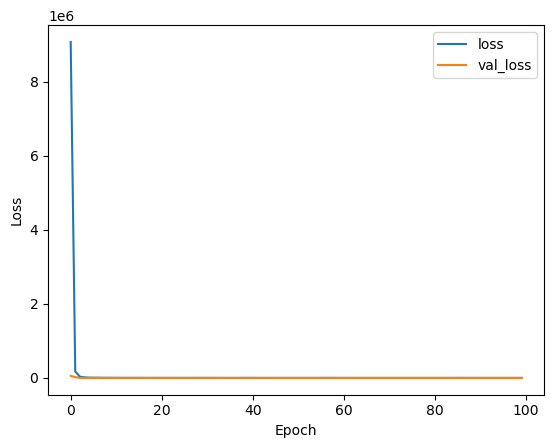

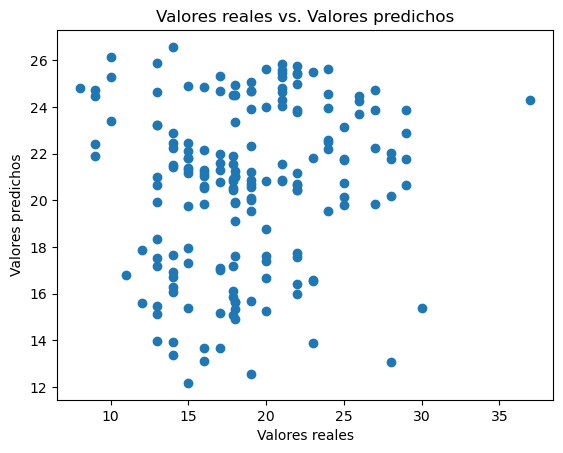

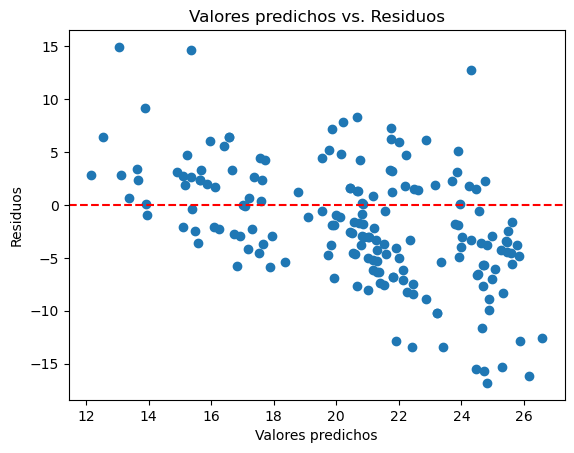

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Crear el modelo
model = Sequential()

# Añadir capas densas
model.add(Dense(70, input_dim = x_train.values.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(70, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='linear'))  # Capa de salida para regresión

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(x_train.values, y_train.values, epochs=100, batch_size=32, validation_split=0.2)

# Predecir los valores con el conjunto de prueba
y_pred = model.predict(x_test.values)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test.values, y_pred)
r2 = r2_score(y_test.values, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualizar los resultados de la historia de entrenamiento
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualizar los resultados de la predicción
plt.scatter(y_test.values, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos')
plt.show()

# Gráfico de residuos
residuals = y_test.values - y_pred.reshape(-1)
plt.scatter(y_pred, residuals)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Valores predichos vs. Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()